In [1]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error

In [2]:
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)

In [3]:
df.shape

(108, 2)

In [4]:
df.head(2)

,Month,Sales
0,1960-01,6550
1,1960-02,8728


In [5]:
df.tail(2)

,Month,Sales
106,1968-11,17180
107,1968-12,14577


In [6]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])

In [7]:
df.head(2)

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728


In [8]:
df.tail(5)

,ds,y
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180
107,1968-12-01,14577


In [9]:
# define the model
model = Prophet()

In [10]:
# fit the model
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## insample

In [11]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [12]:
# use the model to make a forecast
forecast = model.predict(future)

In [13]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14344.429315  12716.516834  15845.484807
1 1968-02-01  14911.718770  13385.612378  16543.645854
2 1968-03-01  20859.142961  19251.513500  22416.418742
3 1968-04-01  22883.352978  21216.419909  24424.092234
4 1968-05-01  24183.139264  22656.119104  25792.256532


In [14]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

           ds          yhat    yhat_lower    yhat_upper
7  1968-08-01  15313.897937  13779.881446  16964.630371
8  1968-09-01  13747.330262  12206.576963  15201.584125
9  1968-10-01  18159.136542  16549.216709  19637.559009
10 1968-11-01  17432.820434  15792.297307  19003.022392
11 1968-12-01  15666.635895  14148.790742  17312.394421


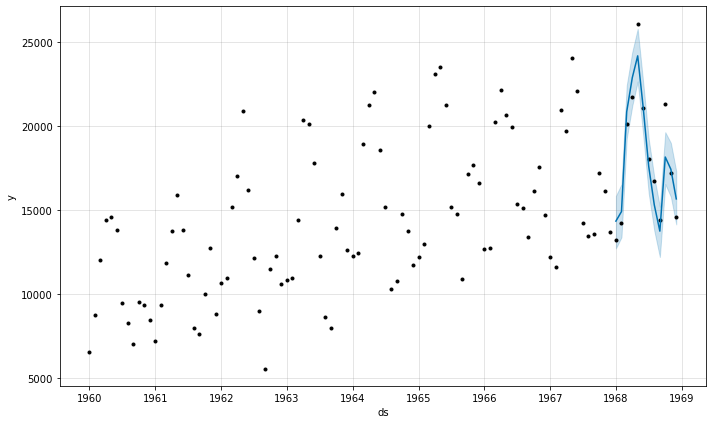

In [15]:
# plot forecast
model.plot(forecast)
pyplot.show()

## outsample

In [16]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1969-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])

In [17]:
# use the model to make a forecast
forecast = model.predict(future)

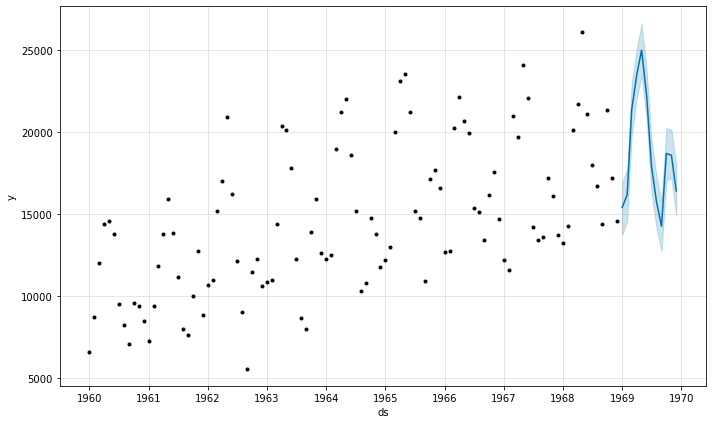

In [18]:
# plot forecast
model.plot(forecast)
pyplot.show()

In [19]:
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15396.026630  13723.283823  16907.794192
1 1969-02-01  16165.838547  14540.821495  17745.412747
2 1969-03-01  21369.121163  19827.094196  22985.242471
3 1969-04-01  23494.793981  22061.515422  25101.320932
4 1969-05-01  25004.900023  23480.340837  26624.268141


## evaluate prophet time series forecasting model on hold out dataset

In [20]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


In [21]:
# define the model
model = Prophet()

In [22]:
# fit the model
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

In [24]:
# use the model to make a forecast
forecast = model.predict(future)

In [25]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.814


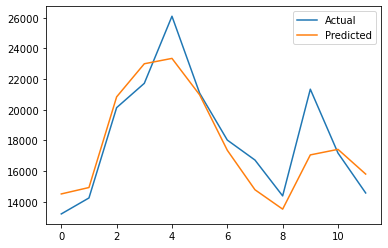

In [26]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [27]:
y_true,y_pred

(array([13210, 14251, 20139, 21725, 26099, 21084, 18024, 16722, 14385,
        21342, 17180, 14577], dtype=int64),
 array([14512.99321632, 14930.90855603, 20842.1653144 , 23000.65657204,
        23350.14843741, 20972.27159664, 17359.55101392, 14785.20292069,
        13521.38046215, 17058.03319375, 17418.68075254, 15808.9484074 ]))